## Ejercicio 2

### a)

Primero cargamos el simulador que vamos a usar.

In [ ]:
from braket.devices import LocalSimulator

sim = LocalSimulator("default")

Definimos dos circuitos:

 - Circuit0: con q0 inicializado a 0.
 - Circuit1: con q0 inicializado a 1.

Los circuitos son practicamente idénticos. La única diferencia es que en circuit1, para inicializar q0 a 1 vamos a poner una puerta X (not) en q0 al inicio del circuito.

q0 va a ser el qubit a enviar, mientras que el resultado va a aparecer en q2.

In [71]:
from braket.circuits import Circuit

                  
circuit0 = Circuit().h(1).cnot(1, 2).cnot(0, 1).h(0).cnot(1, 2).cz(0, 2)

# Ya que los qubit valen 0 por defecto, para inicializar q0 a 1 basta con usar una puerta x (not).
circuit1 = Circuit().x(0).h(1).cnot(1, 2).cnot(0, 1).h(0).cnot(1, 2).cz(0, 2)

print(circuit0)

T  : |0|1|2|3|4|
                
q0 : -----C-H-C-
          |   | 
q1 : -H-C-X-C-|-
        |   | | 
q2 : ---X---X-Z-

T  : |0|1|2|3|4|


Lanzamos la simulación con 1000 shots.

{'0': 1.0, '1': 0.0}


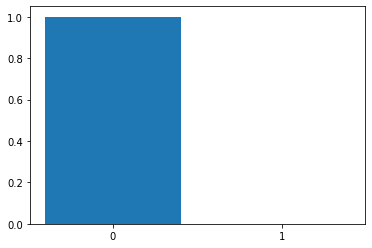

In [69]:
import matplotlib.pylab as plt
# Comenzamos la simulación y obtenemos las mediciones.
measurements = sim.run(circuit0, shots = 1000).result().measurements

# Nos quedamos solo con las mediciones de q2.
ceros = len([x for x in measurements if x[2] == 0]) / 1000
results = {'0': ceros, 
           '1': 1 - ceros}

# Se muestran los resultados.
plt.bar(results.keys(), results.values())
print(results)

Vemos que los resultados son los esperados.

El estado inicial del qubit 0 se transfiere siempre al qubit 2. La tasa de éxito es del 100% en los 100 shots ejecutados, ya que la simulación se ha efectuado sin ruido. Como q0 vale 0 inicialmente, la medición siempre resulta en 0.

Probamos ahora con circuit1.

{'0': 0.0, '1': 1.0}


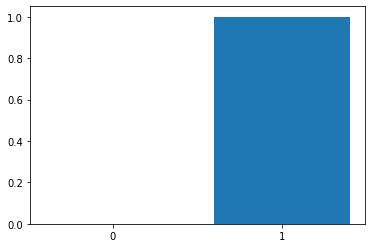

In [30]:
import matplotlib.pylab as plt

measurements = sim.run(circuit1, shots = 1000).result().measurements

# Nos quedamos solo con las mediciones de q2.
ceros = len([x for x in measurements if x[2] == 0]) / 1000
results = {'0': ceros, 
           '1': 1 - ceros}

# Se muestran los resultados.
plt.bar(results.keys(), results.values())
print(results)

Efectivamente, ahora el 100% de las mediciones realizadas sobre q2 al final de cada ejecución dan 1 como resultado.

### b)

In [60]:
sim = LocalSimulator("braket_sv")

Establecemos el tipo de la salida de los nuevos circuitos a state_vector

In [75]:
circuit0_sv = circuit0.state_vector()
circuit1_sv = circuit1.state_vector()

In [77]:
import numpy as np

vector = sim.run(circuit0_sv, shots=0).result().values[0]

# Para que quede más bonito se descarta la parte imaginaria (siempre vale 0) y se
# cambia el formato de impresión.
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})
print(np.real(vector))  

[ 0.5  0.0  0.5  0.0  0.5  0.0  0.5  0.0]


Vemos en este caso que los únicos estados que tienen probabilidad de medirse son aquellos en los que q2 vale 0.

Se observa que 0.5⁴ = 1, por lo que el estado final del vector es válido.

Ahora vamos a probar con q1 inicializado a 1.

In [79]:
vector = sim.run(circuit1_sv, shots=0).result().values[0]

# Para que quede más bonito se descarta la parte imaginaria (siempre vale 0) y se
# cambia el formato de impresión.
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})
print(np.real(vector))  

[ 0.0  0.5  0.0  0.5  0.0  0.5  0.0  0.5]


El resultado vuelve a ser correcto: esta vez solo tienen probabilidad de salir los estados en los que q2 vale 1.